In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime as dt,timedelta as td
from calendar import monthrange as mrng
%matplotlib inline

A continuacion veremos la cantidad de preguntas en StackExchange con tags o titulos que incluyan Haskell, basados en el sistema de [Query](https://data.stackexchange.com/stackoverflow/query/edit/740338#resultSets)

In [50]:
rddSE = spark.read.option("header","false").csv("./QueryResults.csv").rdd
rddSE = rddSE.map(lambda x: (dt.strptime(x[0],"%Y-%m-%d %H:%M:%S"),x[1]))
rddSE = rddSE.map(lambda x: ((x[0].year,x[0].month),int(x[1])))
rddSE = rddSE.reduceByKey(lambda x,y: x+y)
rddSE = rddSE.map(lambda x: (x[0][0],x[0][1],x[1]))
rddSE = rddSE.map(lambda x: (dt(year=x[0],month=x[1],day=mrng(x[0],x[1])[1]),x[2]))
dfSE = rddSE.toDF(['fecha','cant']).toPandas().sort_values(by=['fecha'])

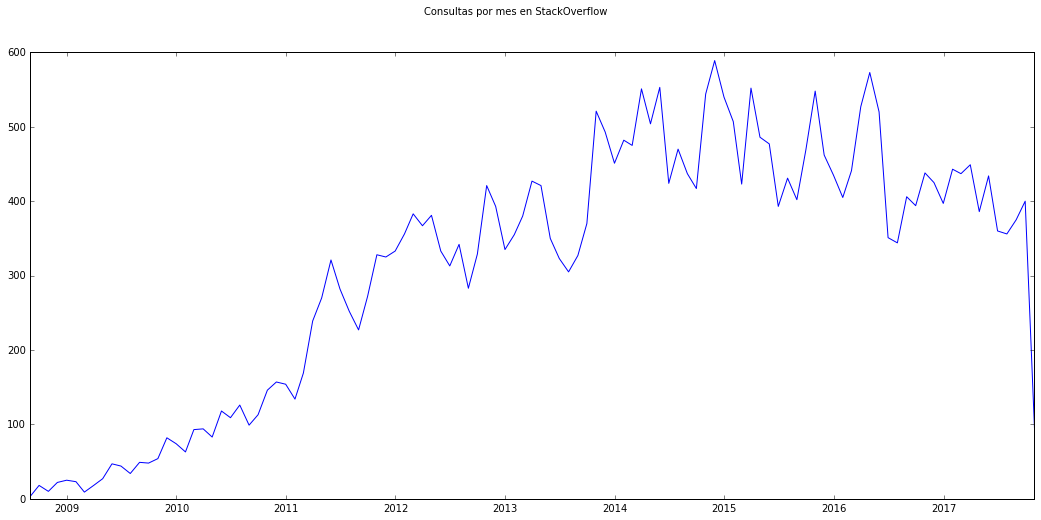

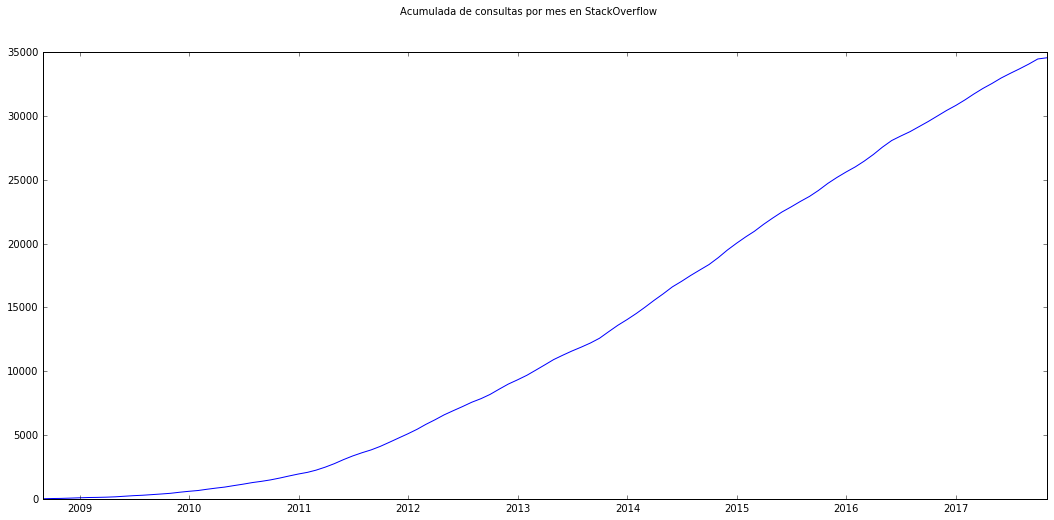

In [71]:
fig = plt.figure(figsize=(18,8))
fig.suptitle("Consultas por mes en StackOverflow")
plt.plot(dfSE.fecha,dfSE.cant)

fig = plt.figure(figsize=(18,8))
fig.suptitle("Acumulada de consultas por mes en StackOverflow")
plt.plot(dfSE.fecha,np.cumsum(dfSE.cant))

plt.show()

In [29]:
rddGH = spark.read.option("header","false").csv("./Haskell_2007-01-01_2017-10-13.csv").rdd
rddGH = rddGH.map(lambda x: (dt.strptime(x[0],"%Y-%m-%d"),x[1]))
rddGH = rddGH.map(lambda x: ((x[0].year,x[0].month),int(x[1])))
rddGH = rddGH.reduceByKey(lambda x,y: x+y)
rddGH = rddGH.map(lambda x: (x[0][0],x[0][1],x[1]))
rddGH = rddGH.map(lambda x: (dt(year=x[0],month=x[1],day=mrng(x[0],x[1])[1]),x[2]))
dfGH = rddGH.toDF(['fecha','cant']).toPandas().sort_values(by=['fecha'])

In [30]:
rddELM = spark.read.option("header","false").csv("./Elm_2007-01-01_2017-10-19.csv").rdd
rddELM = rddELM.map(lambda x: (dt.strptime(x[0],"%Y-%m-%d"),x[1]))
rddELM = rddELM.map(lambda x: ((x[0].year,x[0].month),int(x[1])))
rddELM = rddELM.reduceByKey(lambda x,y: x+y)
rddELM = rddELM.map(lambda x: (x[0][0],x[0][1],x[1]))
rddELM = rddELM.map(lambda x: (dt(year=x[0],month=x[1],day=mrng(x[0],x[1])[1]),x[2]))
dfELM = rddELM.toDF(['fecha','cant']).toPandas().sort_values(by=['fecha'])

In [31]:
rddCLO = spark.read.option("header","false").csv("./Clojure_2007-01-01_2017-10-19.csv").rdd
rddCLO = rddCLO.map(lambda x: (dt.strptime(x[0],"%Y-%m-%d"),x[1]))
rddCLO = rddCLO.map(lambda x: ((x[0].year,x[0].month),int(x[1])))
rddCLO = rddCLO.reduceByKey(lambda x,y: x+y)
rddCLO = rddCLO.map(lambda x: (x[0][0],x[0][1],x[1]))
rddCLO = rddCLO.map(lambda x: (dt(year=x[0],month=x[1],day=mrng(x[0],x[1])[1]),x[2]))
dfCLO = rddCLO.toDF(['fecha','cant']).toPandas().sort_values(by=['fecha'])

In [32]:
rddFSP = spark.read.option("header","false").csv("./F#_2007-01-01_2017-10-19.csv").rdd
rddFSP = rddFSP.map(lambda x: (dt.strptime(x[0],"%Y-%m-%d"),x[1]))
rddFSP = rddFSP.map(lambda x: ((x[0].year,x[0].month),int(x[1])))
rddFSP = rddFSP.reduceByKey(lambda x,y: x+y)
rddFSP = rddFSP.map(lambda x: (x[0][0],x[0][1],x[1]))
rddFSP = rddFSP.map(lambda x: (dt(year=x[0],month=x[1],day=mrng(x[0],x[1])[1]),x[2]))
dfFSP = rddFSP.toDF(['fecha','cant']).toPandas().sort_values(by=['fecha'])

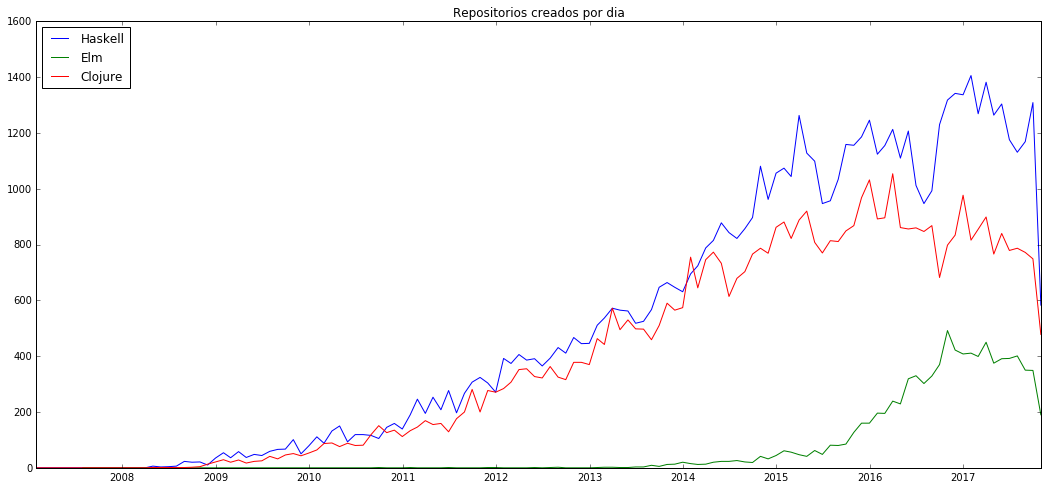

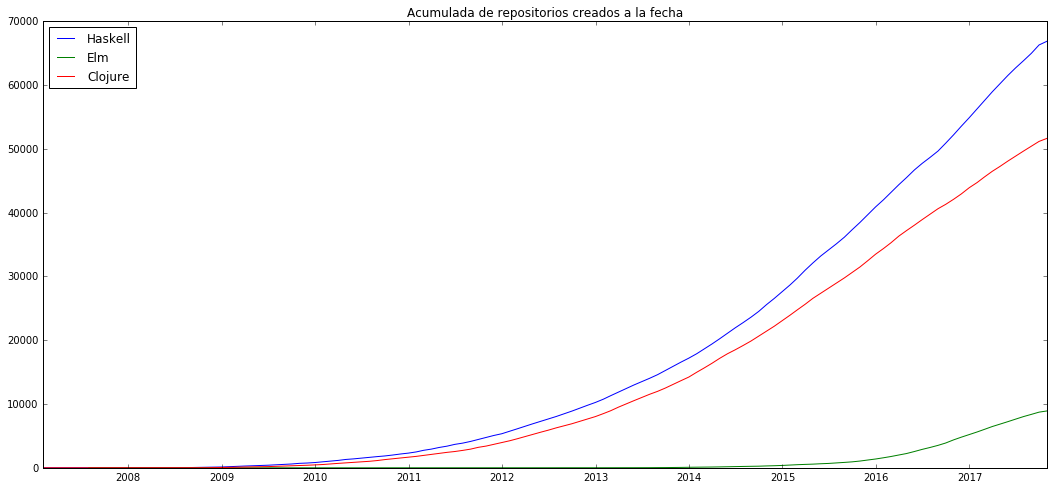

In [34]:
fig = plt.figure(figsize=(18,8))
plt.plot(dfGH.fecha,dfGH.cant,label='Haskell')
plt.plot(dfELM.fecha,dfELM.cant,label='Elm')
plt.plot(dfCLO.fecha,dfCLO.cant,label='Clojure')
#plt.plot(dfFSP.fecha,dfFSP.cant,label='F#')
plt.legend(loc='best')
plt.title('Repositorios creados por dia')

fig = plt.figure(figsize=(18,8))
plt.plot(dfGH.fecha,np.cumsum(dfGH.cant),label='Haskell')
plt.plot(dfELM.fecha,np.cumsum(dfELM.cant),label='Elm')
plt.plot(dfCLO.fecha,np.cumsum(dfCLO.cant),label='Clojure')
#plt.plot(dfFSP.fecha,np.cumsum(dfFSP.cant),label='F#')
plt.legend(loc='best')
plt.title('Acumulada de repositorios creados a la fecha')

plt.show()